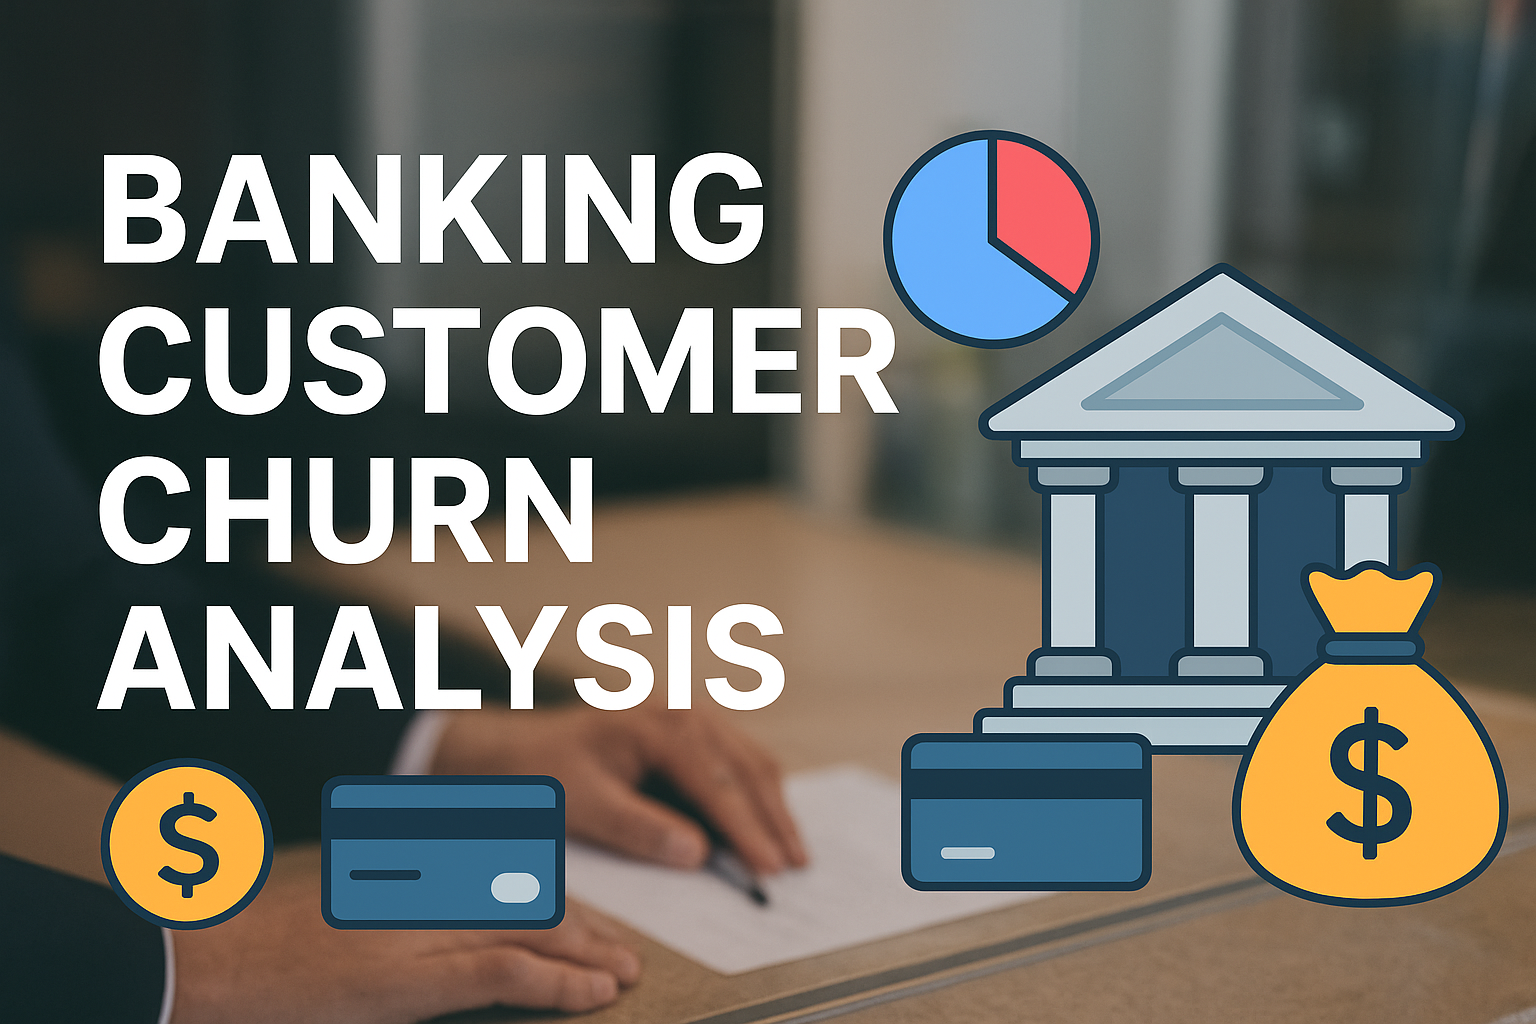

In [ ]:
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv("/content/archive (2).zip")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df['Exited'].value_counts(normalize=True))

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


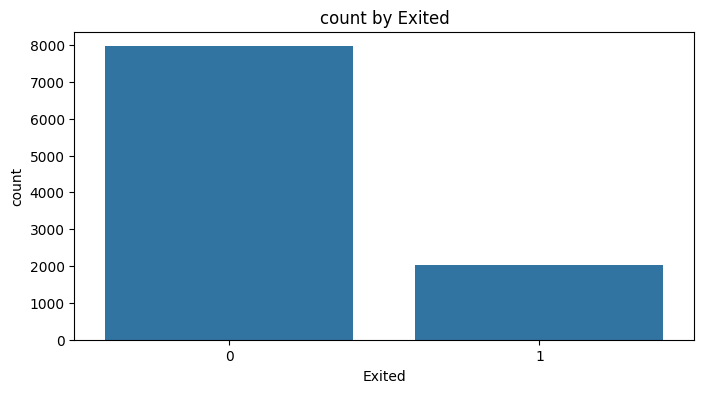

In [ ]:
# What is the distribution of target variable (Exited)?
plt.figure(figsize=(8,4))
sns.countplot(x="Exited", data=df)
plt.title("count by Exited")
plt.xlabel("Exited")
plt.ylabel("count")
plt.show()


Exited
0    7963
1    2037
Name: count, dtype: int64


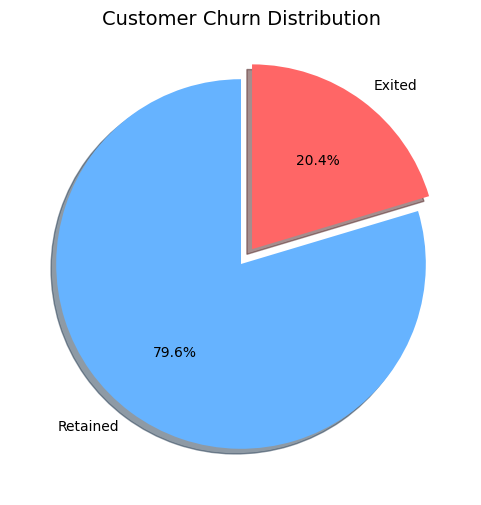

In [ ]:
# 'Exited' is the target variable
# 0 = Customer is still with the bank (Retained)
# 1 = Customer has left the bank (Churned)

labels = ['Retained', 'Exited']   # Meaningful labels
sizes = df['Exited'].value_counts(normalize=True) * 100
colors = ['#66b3ff', '#ff6666']  # Blue for retained, red for exited

plt.figure(figsize=(6,6))
plt.pie(sizes,
    labels=labels,
    autopct='%1.1f%%',   # Show percentages
    startangle=90,       # Start from top
    colors=colors,
    explode=(0, 0.1),    # Slightly pull out churn slice
    shadow=True)
plt.title("Customer Churn Distribution", fontsize=14)
plt.show()


### Around 80% customers are retained, while only 20% have exited the bank.

### Although churn is smaller in proportion, it is crucial to analyze because losing even 20% customers can significantly impact the bank’s revenue.

In [ ]:
# What is the gender distribution and does it impact churn?
gender_churn = df.groupby('Gender')['Exited'].sum()
print("Churn Rate by Gender:")
print(gender_churn)


Churn Rate by Gender:
Gender
Female    1139
Male       898
Name: Exited, dtype: int64


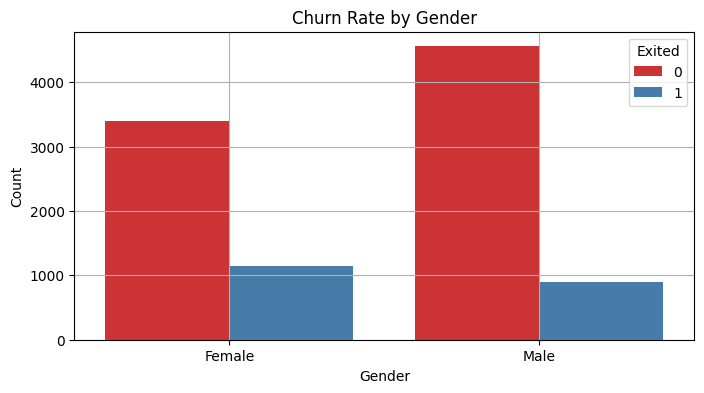

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Gender', hue='Exited', data=df, palette='Set1')
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True)
plt.show()

## *Conclusion: If churn % is higher for Females (e.g., 25%) than Males (e.g., 16%), then women are more likely to leave.*

In [ ]:
# Which geography (France, Spain, Germany, etc.) has higher churn?
Geo = df.groupby('Geography')['Exited'].sum()
print(Geo)

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

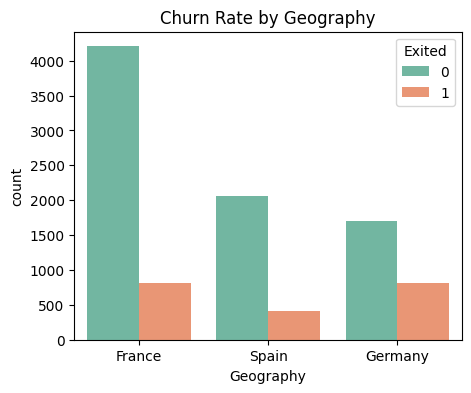

In [82]:
plt.figure(figsize = (5,4))
sns.countplot(palette='Set2', hue = 'Exited', x = "Geography", data=df)
plt.title("Churn Rate by Geography")
plt.show

## *Germany has highest churn (e.g., 32%) compared to France/Spain*

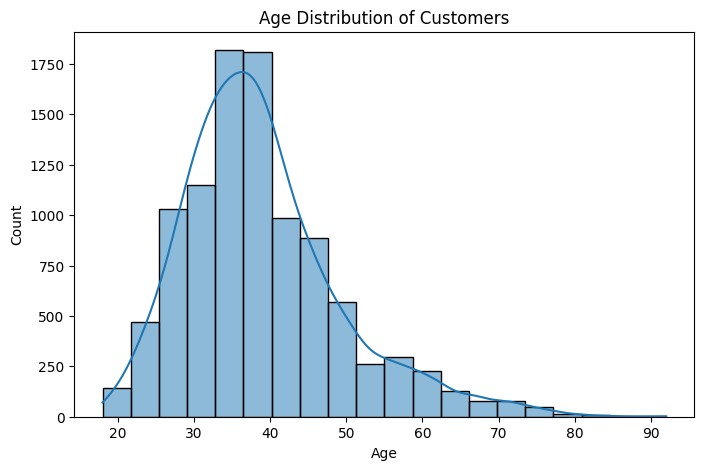

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution of Customers")
plt.show()

In [43]:
# Average age comparison
age_churn = df.groupby('Exited')['Age'].mean()
print("Average Age by Churn Status:")
print(age_churn)

Average Age by Churn Status:
Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64


# *Churned customers tend to be older (avg ~ *44* years) than retained ones (~37 years).*

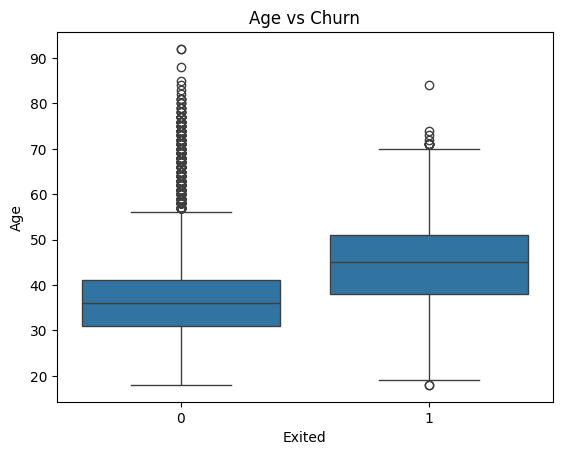

In [44]:
# Boxplot
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Age vs Churn")
plt.show()

In [49]:
# Churn rate by Tenure
tenure_churn = df.groupby('Tenure')['Exited'].sum()
print("Churn Rate by Tenure :")
print(tenure_churn)



Churn Rate by Tenure :
Tenure
0      95
1     232
2     201
3     213
4     203
5     209
6     196
7     177
8     197
9     213
10    101
Name: Exited, dtype: int64


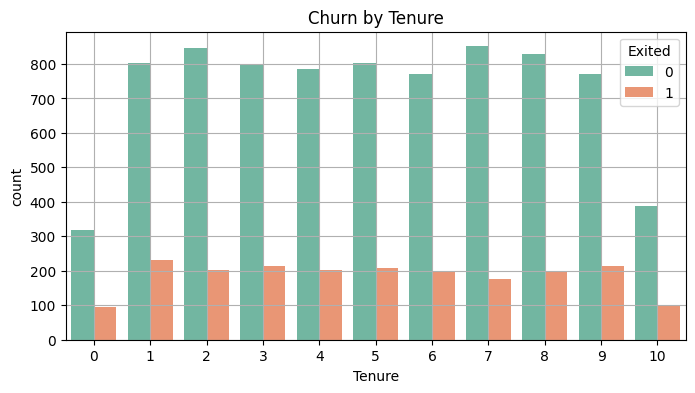

In [53]:
# Plot
plt.figure(figsize=(8,4))
sns.countplot(x='Tenure', hue='Exited', data=df, palette='Set2')
plt.title("Churn by Tenure")
plt.grid(True)
plt.show()

## *No clear trend in tenure, but mid-tenure customers (3–6 years) may churn more.*

In [54]:
# Average balance
balance_churn = df.groupby('Exited')['Balance'].mean()
print("Average Balance by Churn Status:")
print(balance_churn)



Average Balance by Churn Status:
Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64


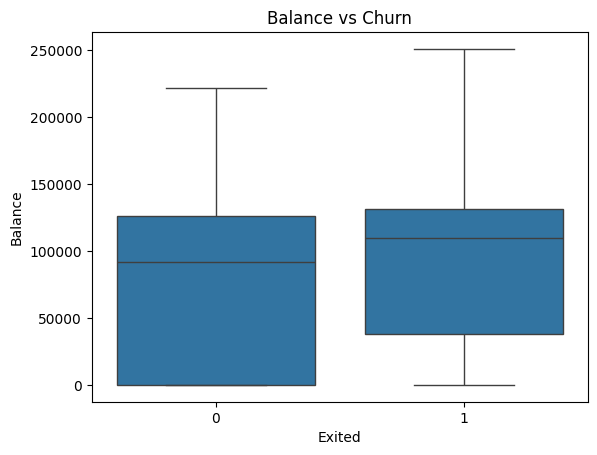

In [56]:
# Boxplot
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title("Balance vs Churn")
plt.show()

## *Conclusion: Churned customers often have higher balances, meaning wealthier customers may be leaving.*

In [83]:
# Churn rate by Active Member status
active_churn = df.groupby('IsActiveMember')['Exited'].sum()
print("Churn Rate by Active Member:")
print(active_churn)



Churn Rate by Active Member:
IsActiveMember
0    1302
1     735
Name: Exited, dtype: int64


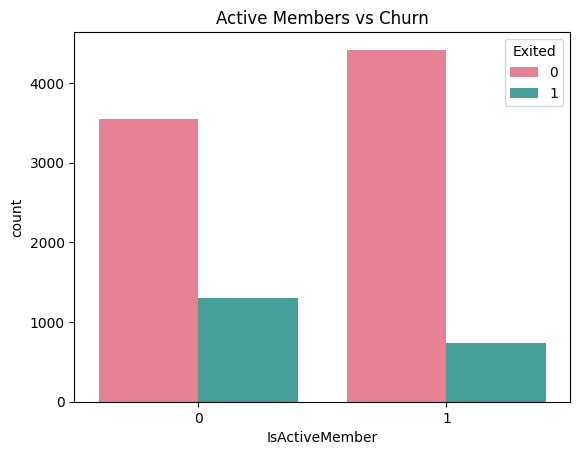

In [62]:
# Plot
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='husl')
plt.title("Active Members vs Churn")
plt.show()

Churn Rate by Active Member Status (%):
 IsActiveMember
0    26.850897
1    14.269074
Name: Exited, dtype: float64


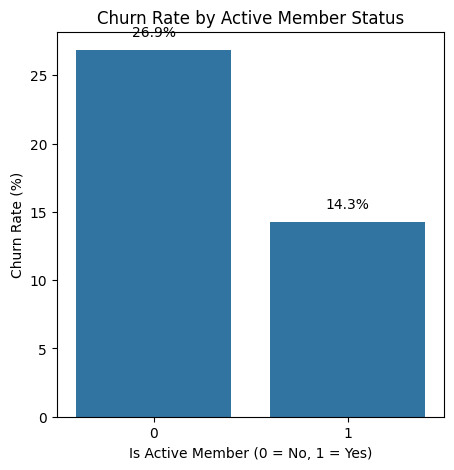

In [89]:
# Another way

# Calculate churn rate for Active vs Inactive members
active_churn = df.groupby('IsActiveMember')['Exited'].mean() * 100
print("Churn Rate by Active Member Status (%):\n", active_churn)

# Convert to DataFrame for plotting
active_churn_df = active_churn.reset_index()
active_churn_df.columns = ['IsActiveMember', 'ChurnRate']

# Plot
plt.figure(figsize=(5,5))
sns.barplot(x='IsActiveMember', y='ChurnRate', data=active_churn_df, legend=False)

# Add values on top of bars
for index, row in active_churn_df.iterrows():
    plt.text(row.name, row.ChurnRate + 1, f"{row.ChurnRate:.1f}%", ha='center')

plt.title("Churn Rate by Active Member Status")
plt.xlabel("Is Active Member (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate (%)")
plt.show()

## *Inactive members (0): ~27% churn rate*
## *Active members (1): ~14% churn rate*
## *Inactive customers are almost twice as likely to leave compared to active ones.*

In [74]:
# Churn rate by Credit Card
card_churn = df.groupby('HasCrCard')['Exited'].mean() * 100
print("Churn Rate by Credit Card Ownership (%):")
print(card_churn)

Churn Rate by Credit Card Ownership (%):
HasCrCard
0    20.814941
1    20.184266
Name: Exited, dtype: float64


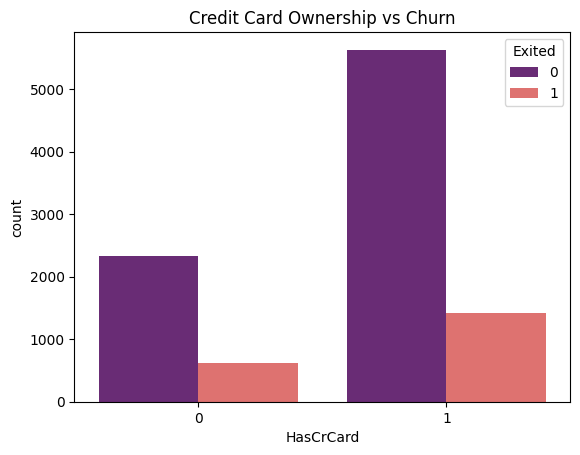

In [75]:
# Plot
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette='magma')
plt.title("Credit Card Ownership vs Churn")
plt.show()

## *Conclusion: Credit card ownership does not have a major effect on churn (rates are similar).*

In [76]:
# Which credit score range has the highest churn?
# Average Credit Score comparison
score_churn = df.groupby('Exited')['CreditScore'].mean()
print("Average Credit Score by Churn Status:")
print(score_churn)

Average Credit Score by Churn Status:
Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64


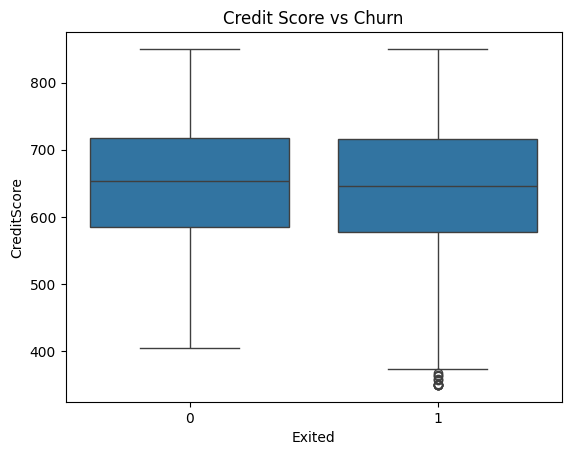

In [77]:
# Boxplot
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title("Credit Score vs Churn")
plt.show()

## *Conclusion: Customers with slightly lower credit scores tend to churn more, but difference is not huge.*

In [78]:
# Average salary comparison
salary_churn = df.groupby('Exited')['EstimatedSalary'].mean()
print("Average Salary by Churn Status:")
print(salary_churn)

Average Salary by Churn Status:
Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64


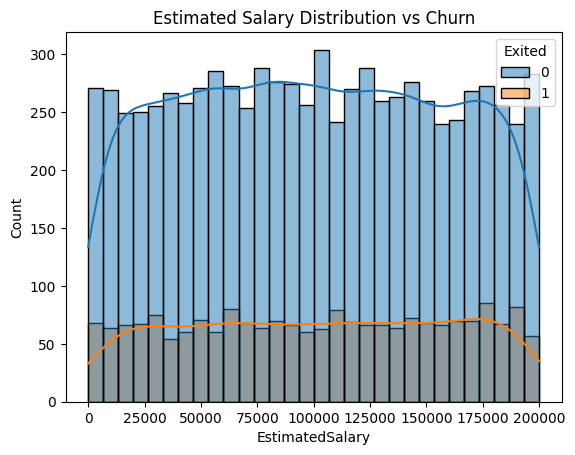

In [79]:
# Histogram
sns.histplot(x='EstimatedSalary', hue='Exited', data=df, kde=True, bins=30)
plt.title("Estimated Salary Distribution vs Churn")
plt.show()

## *Conclusion: Salary does not strongly affect churn (distribution is uniform).*